## Import Libraries

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from warnings import filterwarnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)
filterwarnings("ignore")

## Load Datasets

In [2]:
train_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/train.csv")
test_df = pd.read_csv("/kaggle/input/house-prices-advanced-regression-techniques/test.csv")

In [3]:
train_df.info()
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
print("Dataset of train:")
display(train_df)
print("Dataset of test:")
display(test_df)

Dataset of train:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


Dataset of test:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [5]:
missing = train_df.isna().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print(missing)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64


In [6]:
# LotFrontage – median
train_df=train_df.drop(columns=["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu"])
test_df=test_df.drop(columns=["PoolQC","MiscFeature","Alley","Fence","MasVnrType","FireplaceQu"])


# Numeric - NA means no feature → 0
num_zero = ["MasVnrArea", "GarageYrBlt",
            "BsmtFullBath", "BsmtHalfBath","LotFrontage",
            "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF",
            "GarageCars", "GarageArea"]
for col in num_zero:
    train_df[col] = train_df[col].fillna(0)
    test_df[col] = test_df[col].fillna(0)

# Categorical - NA means "None"
cat_none = [
    "GarageType", "GarageFinish", "GarageQual", "GarageCond",
    "BsmtFinType2", "BsmtExposure", "BsmtFinType1", "BsmtCond", "BsmtQual", "Electrical",
    "MSZoning", "Utilities", "Functional", "Exterior1st", "Exterior2nd", "KitchenQual", "SaleType"
]

for col in cat_none:
    train_df[col] = train_df[col].fillna("None")
    test_df[col] = test_df[col].fillna("None")

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


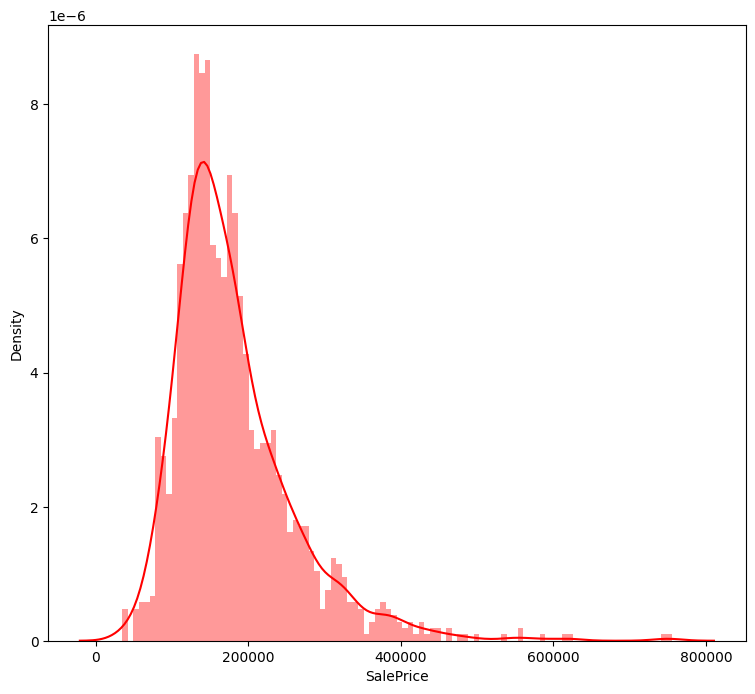

In [7]:
train_df_plot=train_df.drop('Id', axis=1)
print(train_df_plot['SalePrice'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(train_df_plot['SalePrice'], color='r', bins=100, hist_kws={'alpha': 0.4});

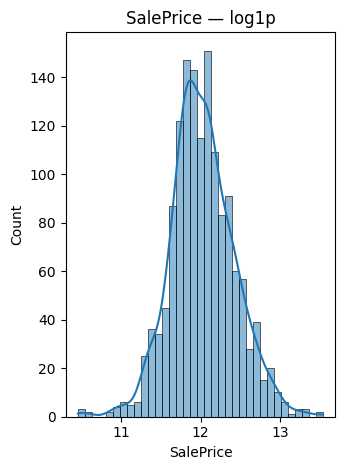

In [8]:
plt.subplot(1,2,2)
sns.histplot(np.log1p(train_df["SalePrice"]), kde=True)
plt.title("SalePrice — log1p")

plt.tight_layout()
plt.show()

## Separate target and features

In [9]:
y_train = train_df['SalePrice']
x_train = train_df.drop(['SalePrice'], axis=1)
x_test = test_df.copy()

## Preprocessing

In [10]:
# Combine for preprocessing
all_data = pd.concat([x_train, x_test], axis=0)
all_data=all_data.drop(columns=["Id"])


#Handle missing values
for col in all_data.columns:
    if all_data[col].dtype == 'object':  # categorical
        all_data[col] = all_data[col].fillna('None')
    else:  # numeric
        all_data[col] = all_data[col].fillna(all_data[col].median())

# One-hot encode categorical variables
all_data = pd.get_dummies(all_data)

# Split back into train and test
x_train = all_data.iloc[:len(train_df), :]
x_test = all_data.iloc[len(train_df):, :]

## 1. Random Forest 

In [11]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42,
    n_jobs=-1,
)

In [12]:
rf_model=rf.fit(x_train,y_train)
# Test: 80 columns
y_test = rf_model.predict(x_test)

# Add predicts to dataset of test 
test1_df= test_df.copy()
test1_df["SalePrice"] = y_test

In [13]:
test1_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,128656.049021
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,154934.426359
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,179160.246754
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,181921.979977
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,197048.545433


## 2. LightGBM

In [14]:
lgbm = LGBMRegressor(
    n_estimators=1000,          
    learning_rate=0.05,        
    num_leaves=31,              
    max_depth=-1,               
    random_state=42,
    n_jobs=-1,
)

In [15]:
lgbm_model= lgbm.fit(x_train,y_train)
# Test: 80 columns
y_test = lgbm_model.predict(x_test)

# Add predicts to dataset of test 
test2_df=test_df.copy()
test2_df["SalePrice"] = y_test

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003567 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3453
[LightGBM] [Info] Number of data points in the train set: 1460, number of used features: 184
[LightGBM] [Info] Start training from score 180921.195890


In [16]:
test2_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,123257.681159
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,157276.400929
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,184278.251760
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,187320.675283
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,198929.132806


## 3. XGBoost

In [17]:
xgb = XGBRegressor(
    n_estimators=1000,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.7,
    colsample_bytree=0.7,
    random_state=42,
    n_jobs=-1
)

In [18]:
xgb_model= xgb.fit(x_train,y_train)
# Test: 80 columns
y_test = xgb_model.predict(x_test)

# Add predicts to dataset of test 
test3_df=test_df.copy()
test3_df["SalePrice"] = y_test

In [19]:
test3_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,120,0,0,6,2010,WD,Normal,129325.726562
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,0,0,12500,6,2010,WD,Normal,163894.781250
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,3,2010,WD,Normal,189635.828125
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,6,2010,WD,Normal,192844.687500
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,0,0,144,0,0,1,2010,WD,Normal,182733.531250


## Submission

In [20]:
test1_df=test1_df[["Id","SalePrice"]]
test2_df=test2_df[["Id","SalePrice"]]
test3_df=test3_df[["Id","SalePrice"]]

In [21]:
test1_df.head()
test2_df.head()
test3_df.head()

,Id,SalePrice
0,1461,129325.726562
1,1462,163894.781250
2,1463,189635.828125
3,1464,192844.687500
4,1465,182733.531250


In [22]:
test1_df.to_csv("rf_submission.csv", index=False) 
test2_df.to_csv("lgbm_submission.csv", index=False) 
test3_df.to_csv("xgboost_submission.csv", index=False) 